In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Завантажуємо датасет

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
N=30000

Нормалізація даних

In [4]:
x_train = x_train[:N] / 255
x_test = x_test[:N] / 255
y_train = y_train[:N]
y_test = y_test[:N]

One-hot encoding 

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

NameError: name 'to_categorical' is not defined

: 

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30000, 28, 28), (30000, 10), (10000, 28, 28), (10000, 10))

# Функція візуалізації

In [ ]:
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.suptitle(title)
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from kerastuner.tuners import RandomSearch
from tensorflow.keras import regularizers

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=64,
                                     max_value=512,
                                     step=64),
                        activation=hp.Choice('activation_' + str(i),
                                             values=['relu', 'tanh', 'linear', 'elu', 'swish', 'softplus']))) 
        model.add(Dropout(rate=hp.Float('dropout_' + str(i),
                                        min_value=0.1,
                                        max_value=0.5,
                                        step=0.1)))
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=hp.Choice('optimizer',
                            values=['adam', 'adamax', 'nadam', 'rmsprop', 'sgd']),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model



Використаємо Keras Tuner для автоматичного пошуку найкращих гіперпараметрів моделі нейронної мережі.

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='fashion_mnist8')
tuner.search_space_summary()

tuner.search(x_train, y_train,
             epochs=20,
             validation_split=0.2)

tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()



Trial 5 Complete [00h 03m 02s]
val_accuracy: 0.8871666789054871

Best val_accuracy So Far: 0.8881666660308838
Total elapsed time: 00h 17m 44s
Results summary
Results in my_dir/fashion_mnist8
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 4
units_0: 448
activation_0: softplus
dropout_0: 0.2
units_1: 192
activation_1: swish
dropout_1: 0.2
optimizer: nadam
units_2: 192
activation_2: linear
dropout_2: 0.1
units_3: 384
activation_3: relu
dropout_3: 0.1
Score: 0.8881666660308838

Trial 4 summary
Hyperparameters:
num_layers: 3
units_0: 384
activation_0: softplus
dropout_0: 0.1
units_1: 64
activation_1: linear
dropout_1: 0.30000000000000004
optimizer: adam
units_2: 192
activation_2: relu
dropout_2: 0.2
units_3: 256
activation_3: relu
dropout_3: 0.2
Score: 0.8871666789054871

Trial 0 summary
Hyperparameters:
num_layers: 4
units_0: 256
activation_0: relu
dropout_0: 0.4
units_1: 384
activation_1: tanh
dropout_1: 0.3000000000000

In [ ]:
best_history = best_model.fit(x_train, y_train,
                              epochs=20,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=1)

Epoch 1/20
750/750 [==============================] - 16s 19ms/step - loss: 0.2356 - accuracy: 0.9109 - val_loss: 0.3500 - val_accuracy: 0.8877
Epoch 2/20
750/750 [==============================] - 14s 19ms/step - loss: 0.2375 - accuracy: 0.9095 - val_loss: 0.3524 - val_accuracy: 0.8832
Epoch 3/20
750/750 [==============================] - 14s 19ms/step - loss: 0.2422 - accuracy: 0.9108 - val_loss: 0.3530 - val_accuracy: 0.8873
Epoch 4/20
750/750 [==============================] - 14s 19ms/step - loss: 0.2287 - accuracy: 0.9127 - val_loss: 0.3317 - val_accuracy: 0.8907
Epoch 5/20
750/750 [==============================] - 14s 19ms/step - loss: 0.2222 - accuracy: 0.9166 - val_loss: 0.3476 - val_accuracy: 0.8907
Epoch 6/20
750/750 [==============================] - 16s 21ms/step - loss: 0.2251 - accuracy: 0.9196 - val_loss: 0.3719 - val_accuracy: 0.8875
Epoch 7/20
750/750 [==============================] - 14s 18ms/step - loss: 0.2129 - accuracy: 0.9208 - val_loss: 0.3885 - val_accuracy:

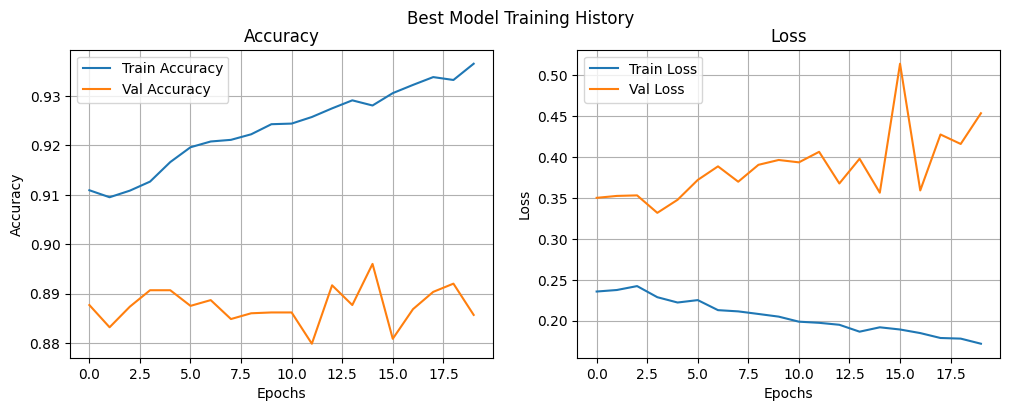

In [ ]:
plot_training_history(best_history, title='Best Model Training History')

In [ ]:
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f'Best model test accuracy: {test_acc:.4f}')

Best model test accuracy: 0.8772
